## Preliminary Results

#### Read Data from the Web

In [1]:
# Loads the packages used in the data analysis
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()   masks gridExtra::combine()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Loads the dataset from the web
dataset <- read.csv(url("https://docs.google.com/spreadsheets/d/1SXkE_T-CmZzd1kPAIArQOLg9GQa_ftnmVMAI30sVDqo/export?gid=277724310&format=csv")) 

# Prints the first 6 rows of the dataset
table_1 <- "Table 1 - First Six Columns of the Dataset"
table_1
head(dataset)

# Prints the last 6 rows of the dataset
table_2 <- "Table 2 - Last Six Columns of the Dataset"
table_2
tail(dataset)

[1] "Table 1 - First Six Columns of the Dataset"

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2012,12,14,8,52,,Oakridge,491285.0,5453433
2,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
3,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
4,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
5,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
6,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166


[1] "Table 2 - Last Six Columns of the Dataset"

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
877874,Vehicle Collision or Pedestrian Struck (with Injury),2023,2,22,12,12,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786,5456719
877875,Vehicle Collision or Pedestrian Struck (with Injury),2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786,5455143
877876,Vehicle Collision or Pedestrian Struck (with Injury),2005,7,20,18,57,YUKON ST / W KING EDWARD AVE,Riley Park,491786,5455143
877877,Vehicle Collision or Pedestrian Struck (with Injury),2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park,491786,5455143
877878,Vehicle Collision or Pedestrian Struck (with Injury),2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park,491835,5455126
877879,Vehicle Collision or Pedestrian Struck (with Injury),2013,12,27,14,40,YUKON ST / W KING EDWARD AVE,Riley Park,491835,5455126


#### Cleaning and Wrangling

In [3]:
# Removes the X and Y columns as well as inaccurate data
tidy_dataset <- dataset |>
    select(-X, -Y) |>
    na.omit()

# Prints the first 6 rows of the dataset
table_3 <- "Table 3 - First Six Columns of the Tidy Dataset"
table_3
head(tidy_dataset)

# Prints the last 6 rows of the dataset
table_4 <- "Table 4 - Last Six Columns of the Tidy Dataset"
table_4
tail(tidy_dataset)

[1] "Table 3 - First Six Columns of the Tidy Dataset"

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Break and Enter Commercial,2012,12,14,8,52,,Oakridge
2,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview
3,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End
4,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End
5,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End
6,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End


[1] "Table 4 - Last Six Columns of the Tidy Dataset"

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
877874,Vehicle Collision or Pedestrian Struck (with Injury),2023,2,22,12,12,YUKON ST / W BROADWAY AVE,Mount Pleasant
877875,Vehicle Collision or Pedestrian Struck (with Injury),2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park
877876,Vehicle Collision or Pedestrian Struck (with Injury),2005,7,20,18,57,YUKON ST / W KING EDWARD AVE,Riley Park
877877,Vehicle Collision or Pedestrian Struck (with Injury),2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park
877878,Vehicle Collision or Pedestrian Struck (with Injury),2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park
877879,Vehicle Collision or Pedestrian Struck (with Injury),2013,12,27,14,40,YUKON ST / W KING EDWARD AVE,Riley Park


#### Plotting the Raw Data

We will start by plotting the population data to visualize the number of other thefts and break and enters, out of the total number of crimes between 2004-2008 and 2018-2022.

In [4]:
# Filters the dataset for crimes during 2004 - 2008 and 2018 - 2022

raw_data <- tidy_dataset |>
    filter(YEAR %in% (2004:2008) | YEAR %in% (2018:2022)) |>
    select(TYPE, YEAR) |>
    group_by(TYPE, YEAR) |>
    summarize(n = n()) |>
    mutate(ranges = cut(YEAR, c(2004, 2008, 2017, 2022),
                        labels = c("[2004, 2008]","NA", "[2018, 2022]"), include.lowest = TRUE)) 

`summarise()` has grouped output by 'TYPE'. You can override using the
`.groups` argument.


In [7]:
# Calculates the sum of each crime

pop_1 = raw_data |>
    filter(ranges == "[2004, 2008]") |>
    summarize(n = sum(n))

# Number of crimes from 2004 - 2008
pop_1_total_crime = pop_1 |>
    summarize(n = sum(n)) |>
    as.numeric()

# Number of other thefts from 2004 - 2008
pop_1_other_thefts = pop_1 |>
    filter(TYPE == "Other Theft") |>
    summarize(n = sum(n)) |>
    as.numeric()

# Number of break and enters from 2004 - 2008
pop_1_bne = pop_1 |>
    filter(TYPE == "Break and Enter Commercial" | TYPE == "Break and Enter Residential/Other") |>
    summarize(n = sum(n)) |>
    as.numeric()

pop_2 = raw_data |>
    filter(ranges == "[2018, 2022]") |>
    summarize(n = sum(n))

# Number of crimes from 2018 - 2022
pop_2_total_crime = pop_2 |>
    summarize(n = sum(n)) |>
    as.numeric()

# Number of other thefts from 2018 - 2022
pop_2_other_thefts = pop_2 |>
    filter(TYPE == "Other Theft") |>
    summarize(n = sum(n)) |>
    as.numeric()

# Number of break and enters from 2018 - 2022
pop_2_bne = pop_2 |>
    filter(TYPE == "Break and Enter Commercial" | TYPE == "Break and Enter Residential/Other") |>
    summarize(n = sum(n)) |>
    as.numeric()

crimes <- c(pop_1_bne, pop_1_other_thefts, pop_1_total_crime, pop_2_bne, pop_2_other_thefts, pop_2_total_crime)

labels <- c("Break and Enters", "Other Thefts", "All Crimes","Break and Enters", "Other Thefts", "All Crimes")

years <- c("2004-2008","2004-2008","2004-2008","2018-2022","2018-2022","2018-2022")

# Creates the table of the number of crimes in each year
crimes_table <- tibble(labels, years, crimes)

comment(table) <- "Table 5 - Types of Crimes in Year Range"

comment(table)
crimes_table

[1] "Table 5 - Types of Crimes in Year Range"

labels,years,crimes
<chr>,<chr>,<dbl>
Break and Enters,2004-2008,40591
Other Thefts,2004-2008,52281
All Crimes,2004-2008,247250
Break and Enters,2018-2022,20861
Other Thefts,2018-2022,51555
All Crimes,2018-2022,196376


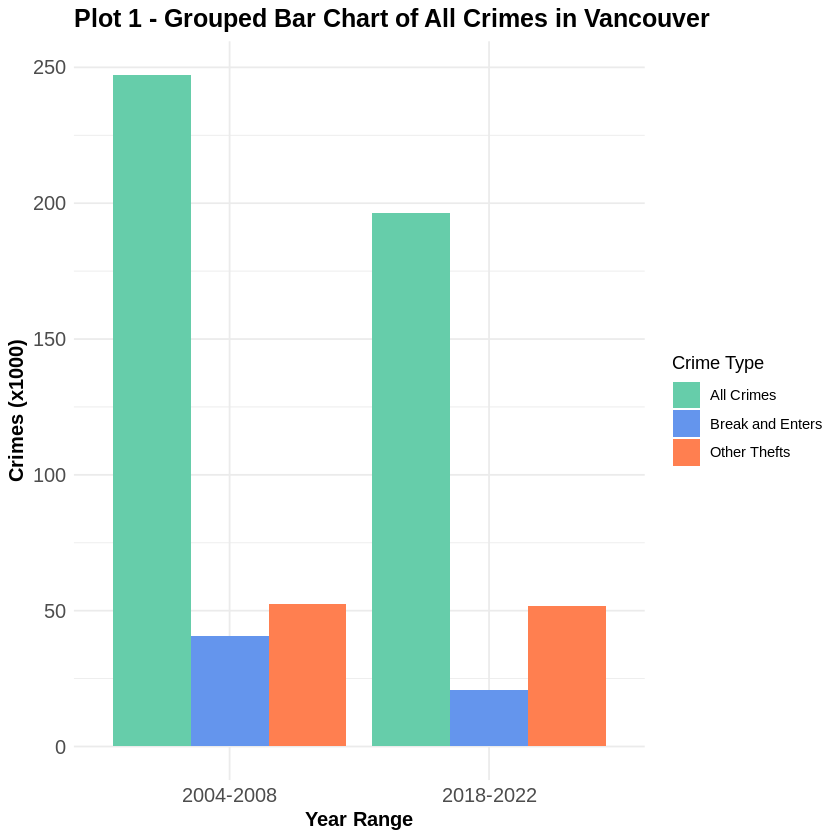

In [9]:
# Plots the number of crimes in each year
raw_data_plot <- crimes_table |>
    ggplot(aes(x = years, y = crimes/1000, fill = labels)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = "Plot 1 - Grouped Bar Chart of All Crimes in Vancouver",
    x = "Year Range",
    y = "Crimes (x1000)",
        fill = "Crime Type") +
    scale_fill_manual(values = c("All Crimes" = "aquamarine3", "Break and Enters" = "cornflower blue", "Other Thefts" = "coral")) +
    theme_minimal() +
    theme(axis.text=element_text(size=12),
        axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(size = 15, face = "bold"))

raw_data_plot

#### Estimating the Parameter ####

In [10]:
# Filters the dataset for years 2004 - 2008 and selects the type of crime and the neighbourhood
crime_2004_2008 <- tidy_dataset |>
    filter(YEAR %in% (2004:2008)) |>
    select(TYPE, NEIGHBOURHOOD)

# Prints the first 6 rows of the dataset
table_6 <- "Table 6 - All Crimes from 2004 - 2008"
table_6
head(crime_2004_2008)

[1] "Table 6 - All Crimes from 2004 - 2008"

,TYPE,NEIGHBOURHOOD
,<chr>,<chr>
1,Break and Enter Commercial,West End
2,Break and Enter Commercial,West End
3,Break and Enter Commercial,West End
4,Break and Enter Commercial,West End
5,Break and Enter Commercial,West End
6,Break and Enter Commercial,West End


In [11]:
set.seed(1)

# Randomly samples the 2004-2008 crime population (size = 500)
sample_2004_2008 <- crime_2004_2008 |>
    rep_sample_n(size = 500, replace = FALSE) |>
    ungroup() |>
    select(-replicate)

# Filters for "Other Theft" from the random sample
other_theft_2004_2008 <- sample_2004_2008 |>
    filter(TYPE == "Other Theft") 

# Calculates p̂ for other theft from 2004-2008
phat_theft_1 <- nrow(other_theft_2004_2008)/nrow(sample_2004_2008)

# Prints the other theft proportion estimate from 2004-2008
print(paste0("The estimated proportion of other theft crimes out of all crimes in Vancouver from 2004 - 2008 is ", phat_theft_1, "."))

# Filters for "Break and Enter Commercial" and "Break and Enter Residential/Other" from the random sample
break_and_enter_2004_2008 <- sample_2004_2008 |>
    filter(TYPE == "Break and Enter Commercial" | TYPE == "Break and Enter Residential/Other") 

# Calculates p̂ for break and enters from 2004-2008
phat_bne_1 <- nrow(break_and_enter_2004_2008)/nrow(sample_2004_2008)

# Prints the break and enter proportion estimate from 2004-2008
print(paste0("The estimated proportion of break and enter crimes out of all crimes in Vancouver from 2004 - 2008 is ", phat_bne_1, "."))

[1] "The estimated proportion of other theft crimes out of all crimes in Vancouver from 2004 - 2008 is 0.21."
[1] "The estimated proportion of break and enter crimes out of all crimes in Vancouver from 2004 - 2008 is 0.196."


Now, we will find the sample proportions for the crimes of interest, between 2018 and 2022.

In [12]:
# Filters the dataset for years 2004 - 2008 and selects the type of crime and the neighbourhood
crime_2018_2022 <- tidy_dataset |>
    filter(YEAR %in% (2018:2022)) |>
    select(TYPE, NEIGHBOURHOOD)

# Prints the first 6 rows of the dataset
table_7 <- "Table 7 - All Crimes from 2018 - 2022"
table_7
head(crime_2018_2022)

[1] "Table 7 - All Crimes from 2018 - 2022"

,TYPE,NEIGHBOURHOOD
,<chr>,<chr>
1,Break and Enter Commercial,Fairview
2,Break and Enter Commercial,West End
3,Break and Enter Commercial,West End
4,Break and Enter Commercial,West End
5,Break and Enter Commercial,West End
6,Break and Enter Commercial,West End


In [13]:
set.seed(2)

# Randomly samples the 2018-2022 crime population (size = 500)
sample_2018_2022 <- crime_2018_2022 |>
    rep_sample_n(size = 500, replace = FALSE) |>
    ungroup() |>
    select(-replicate)

# Filters for "Other Theft" from the random sample
other_theft_2018_2022 <- sample_2018_2022 |>
    filter(TYPE == "Other Theft") 

# Calculates p̂ for other theft from 2018-2022
phat_theft_2 <- nrow(other_theft_2018_2022)/nrow(sample_2018_2022)

# Prints the other theft proportion estimate from 2018-2022
print(paste0("The estimated proportion of other theft crimes out of all crimes in Vancouver from 2018 - 2022 is ", phat_theft_2, "."))

# Filters for "Break and Enter Commercial" and "Break and Enter Residential/Other" from the random sample
break_and_enter_2018_2022 <- sample_2018_2022 |>
    filter(TYPE == "Break and Enter Commercial" | TYPE == "Break and Enter Residential/Other") 

# Calculates p̂ for break and enters from 2018-2022
phat_bne_2 <- nrow(break_and_enter_2018_2022)/nrow(sample_2018_2022)

# Prints the break and enter proportion estimate from 2018-2022
print(paste0("The estimated proportion of break and enter crimes out of all crimes in Vancouver from 2018 - 2022 is ", phat_bne_2, "."))

[1] "The estimated proportion of other theft crimes out of all crimes in Vancouver from 2018 - 2022 is 0.264."
[1] "The estimated proportion of break and enter crimes out of all crimes in Vancouver from 2018 - 2022 is 0.148."


Finally, we will calculate the difference in sample proportions—our sample statistic of interest.

In [14]:
# Calculates the difference in sample proportions for other theft
phat_theft = phat_theft_2 - phat_theft_1
print(paste0("The estimated difference in proportion of other theft crimes from 2018 - 2022 and 2004 - 2008 out of all crimes in Vancouver is ", phat_theft, "."))


# Calculates the difference in sample proportions for break and enters
phat_bne = phat_bne_2 - phat_bne_1
print(paste0("The estimated difference in proportion of break and enters from 2018 - 2022 and 2004 - 2008 out of all crimes in Vancouver is ", phat_bne, "."))

[1] "The estimated difference in proportion of other theft crimes from 2018 - 2022 and 2004 - 2008 out of all crimes in Vancouver is 0.054."
[1] "The estimated difference in proportion of break and enters from 2018 - 2022 and 2004 - 2008 out of all crimes in Vancouver is -0.048."


Now, we will visualize our statistic of interest in a table.

In [15]:
crime <- c("Other Theft", "Break and Enters")
p_hat <- c(phat_theft, phat_bne) 

p_hat_table <- tibble(crime, p_hat)

comment(p_hat_table) <- "Table 8 - Difference in Estimated Proportion of Crimes from 2018 - 2022 and 2004 - 2008"

comment(p_hat_table)
p_hat_table 

[1] "Table 8 - Difference in Estimated Proportion of Crimes from 2018 - 2022 and 2004 - 2008"

crime,p_hat
<chr>,<dbl>
Other Theft,0.054
Break and Enters,-0.048
